In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("simulation.h5")

In [4]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [5]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([7090, 7091, 7092, 7093, 7094, 7095, 7096, 7097, 7098, 7099, 7100,
       7101, 7102, 7103, 7104, 7105, 7106]), array([79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79]))
-2827.3570477366725


In [6]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([1488., 1416., 1629., 1614., 1570., 1630., 1505., 1504., 1580.,
       1544., 1134., 1445., 1400., 1511., 1407., 1482., 1486., 1436.,
       1489., 1593., 1725., 1420., 1410., 1434., 1618., 1731., 1607.,
       1394., 1768., 1502., 1524., 1569., 1657., 1443., 1623., 1598.,
       1383., 1203., 1670., 1261., 1640., 1253., 1245., 1304., 1760.,
       1295., 1668., 1368., 1551., 1707.,  924., 1596., 1336., 1407.,
       1604., 1438., 1747., 1722., 1594., 1356., 1592., 1480., 1574.,
       1409., 1618., 1297., 1604., 1598., 1459., 1700., 1504., 1501.,
        485., 1900., 1026., 1320., 1504., 1306., 1322., 1326., 1660.,
       1658., 1296.,  826., 1240., 1283., 1429., 1395., 1476., 1593.,
       1451., 1594., 1697., 1651., 1254., 1354., 1437., 1419., 1630.,
       1606., 1405., 1408., 1516., 1324., 1258., 1630., 1701., 1422.,
       1563., 1588., 1542., 1385., 1526., 1360., 1427., 1542., 1258.,
       1684., 1637., 1478.])

[510.35701126 689.30023055 676.77627283 417.35932977 928.0850881
 575.84698194 620.75011133]
flat chain shape: (590400, 7)
flat log prob shape: (590400,)


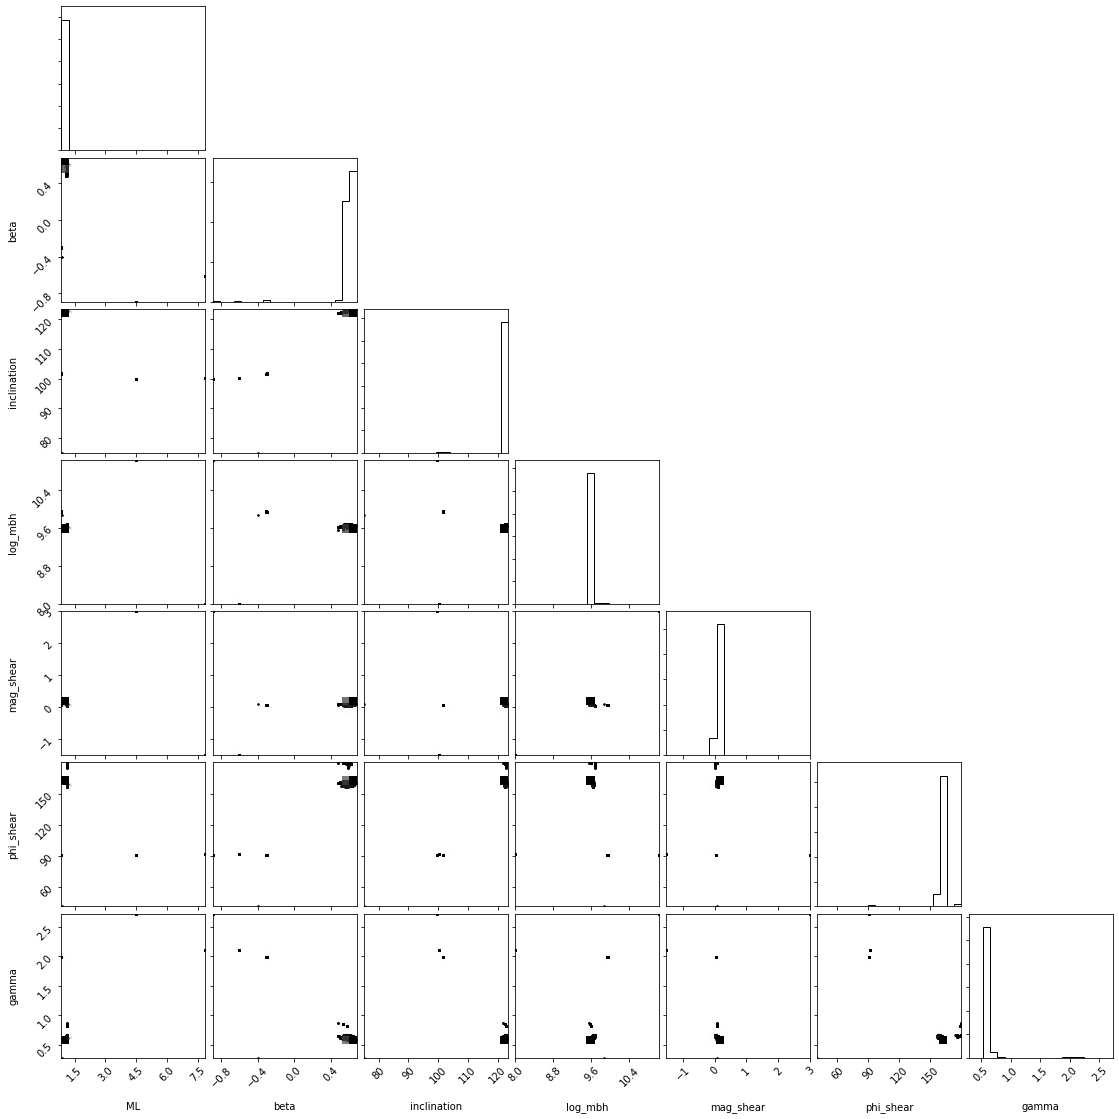

In [7]:
#Corner plots

labels = ["ML", "beta", "inclination", "log_mbh", "mag_shear", "phi_shear", "gamma"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=3000, flat=True)
log_prob_samples = read.get_log_prob(discard=3000, flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels);

In [8]:
tau = read.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 158;
tau: [510.35701126 689.30023055 676.77627283 417.35932977 928.0850881
 575.84698194 620.75011133]

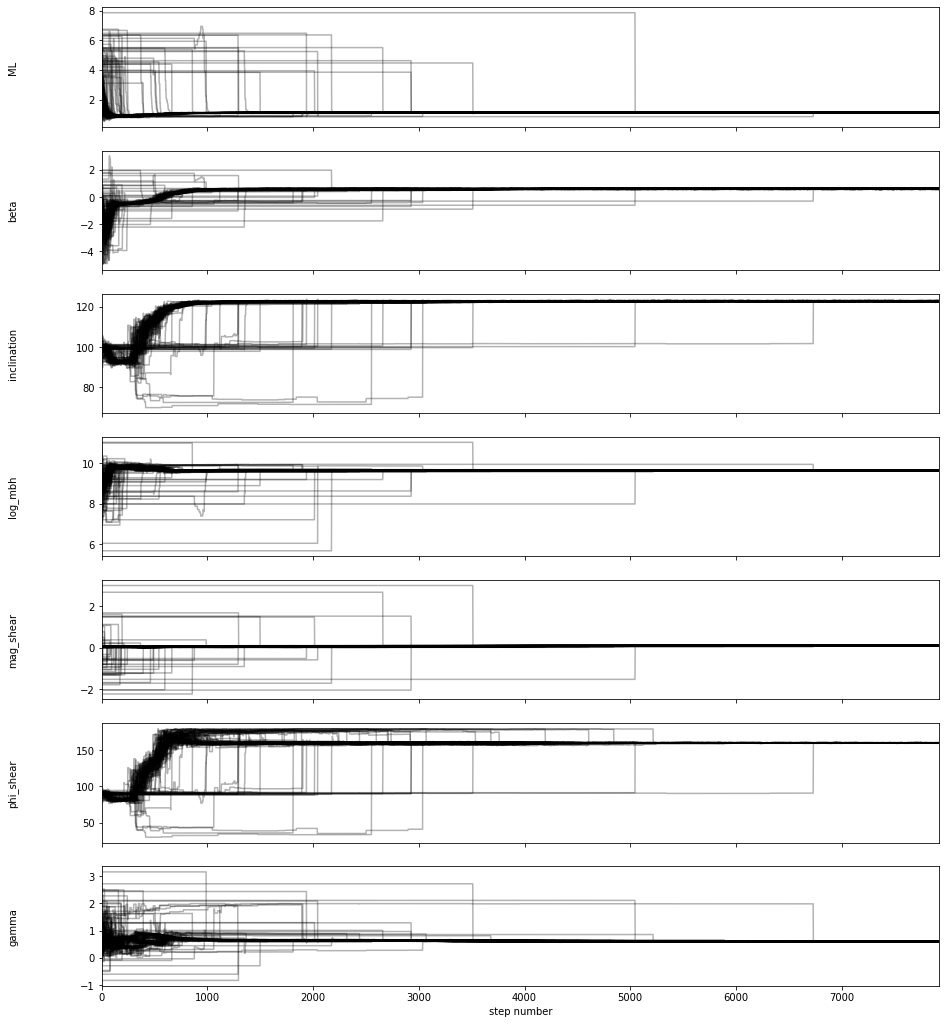

In [9]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

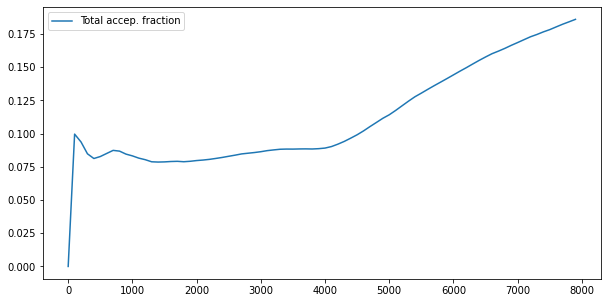

In [13]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.ylim()
plt.legend()

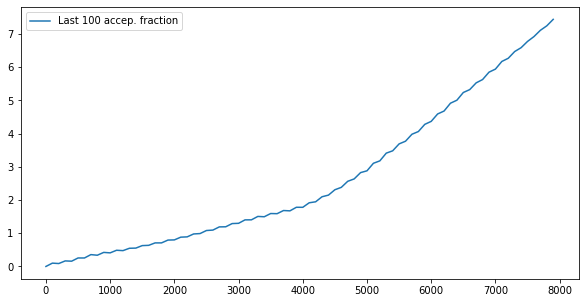

In [15]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim()
plt.legend()